
What is expected in EDA
1. Data loading
2. Checking Descriptive stats: Univariate anlysis
3. Check if any null values present or not
4. Bi- variate anaylsis: a. Graphical Method, b. Stats(> GroupBy, > CrossTab
5. Data Scaling & Normalization
6. Check for data balancing: only for Classification problem/Recommendation
7. Model Building


In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')     #to filter warnings, ignore warnings

In [2]:
df = pd.read_csv('/content/SalesDataset.csv')
df.sample(frac = 1)   #SHuffle dataset

,InvoiceID,Date,Year,CustomerID,CustomerName,Gender,Age,Country,Region,StoreID,...,Category,SubCategory,Quantity,UnitPrice,Discount,TotalPrice,Cost,Profit,PaymentMethod,OrderStatus
20176,INV020177,2019-09-25,2019,CUST3701,Karen Heath,Female,54,Canada,North America,STR170,...,Home,Kitchen,10,155.23,265.54,1286.76,787.78,498.98,Card,Returned
26607,INV026608,2019-03-13,2019,CUST4263,Christopher Carpenter,Other,37,China,Asia,STR297,...,Sports,Outdoor,5,805.61,267.84,3760.21,2345.53,1414.68,UPI,Completed
6004,INV006005,2024-12-25,2024,CUST9862,Jason Gomez,Male,36,Brazil,South America,STR267,...,Beauty,Fragrance,5,664.05,530.72,2789.53,2400.32,389.21,UPI,Completed
27443,INV027444,2020-01-11,2020,CUST1919,Brian Diaz,Other,44,UK,Europe,STR284,...,Sports,Outdoor,6,91.55,6.36,542.94,427.01,115.93,Card,Completed
29240,INV029241,2024-10-19,2024,CUST3940,Austin Wise,Male,70,Australia,Oceania,STR567,...,Home,Furniture,1,856.51,42.14,814.37,498.30,316.07,EMI,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33067,INV033068,2022-11-13,2022,CUST1336,Cory Atkinson,Female,68,Australia,Oceania,STR591,...,Sports,Outdoor,1,20.99,4.11,16.88,14.65,2.23,EMI,Returned
41500,INV041501,2021-11-25,2021,CUST9203,Amy Garcia,Female,23,South Africa,Africa,STR653,...,Home,Kitchen,7,516.51,155.75,3459.82,2204.13,1255.69,NetBanking,Completed
4353,INV004354,2019-09-27,2019,CUST5029,Brian Mcfarland,Female,54,Australia,Oceania,STR121,...,Beauty,Skincare,8,789.53,1049.31,5266.93,3934.69,1332.24,Cash,Cancelled
5242,INV005243,2021-12-15,2021,CUST7019,Daniel Wilson,Female,61,South Africa,Africa,STR256,...,Apparel,Accessories,7,215.58,228.98,1280.08,911.93,368.15,UPI,Completed


In [17]:
#Checking columns of the dataset
df.columns

Index(['InvoiceID', 'Date', 'Year', 'CustomerID', 'CustomerName', 'Gender',
       'Age', 'Country', 'Region', 'StoreID', 'StoreLocation', 'SalesRep',
       'ProductID', 'ProductName', 'Category', 'SubCategory', 'Quantity',
       'UnitPrice', 'Discount', 'TotalPrice', 'Cost', 'Profit',
       'PaymentMethod', 'OrderStatus', 'Day', 'Month'],
      dtype='object')

In [18]:
#Checking duplicate records if any
df.duplicated().sum()

np.int64(0)

In [22]:
df['InvoiceID'].unique()

array(['INV000001', 'INV000002', 'INV000003', ..., 'INV045985',
       'INV045986', 'INV045987'], dtype=object)

In [24]:
#Calculate Unique numbers values presemt in the col 'InvoiceID'
#value_counts()- col k ander k distribution k counts
df['InvoiceID'].nunique()

45987

In [25]:
df['Discount'].unique()

array([389.15,  68.52, 333.75, ..., 175.96, 228.8 , 338.73])

In [26]:
#Calculate Unique numbers values presemt in the col 'InvoiceID'
#value_counts()- col k ander k distribution k counts
df['Discount'].nunique()

31277

In [30]:
df['Discount'].value_counts() #tells distributions of inside values, like 5.56 has 9 counts values

,count
Discount,
5.46,9
18.09,9
23.06,9
123.23,9
11.75,8
...,...
166.27,1
182.40,1
410.54,1


In [31]:
df['Discount'].value_counts().sort_values(ascending= False) #basically descend

,count
Discount,
18.09,9
5.46,9
23.06,9
123.23,9
5.93,8
...,...
550.29,1
375.83,1
773.32,1


In [32]:
df['Discount'].value_counts().sort_values(ascending= True) #ascending

,count
Discount,
608.38,1
21.98,1
260.20,1
566.12,1
236.84,1
...,...
0.33,8
123.23,9
5.46,9


In [35]:
#Top 10 discount offered
df['Discount'].value_counts().sort_values(ascending= False).head(10) #basically descend

,count
Discount,
18.09,9
5.46,9
23.06,9
123.23,9
5.93,8
4.76,8
23.31,8
3.45,8
25.86,8


In [37]:
#Top 10 values
df['Discount'].value_counts().sort_values(ascending= True).tail(10) #ascending but last 10

,count
Discount,
5.93,8
2.48,8
8.80,8
3.45,8
11.75,8
0.33,8
123.23,9
5.46,9
23.06,9


In [38]:
#Top 10 discount offered
df['Discount'].value_counts().sort_values(ascending= False)[:10] #basically descend

,count
Discount,
18.09,9
5.46,9
23.06,9
123.23,9
5.93,8
...,...
65.24,4
16.53,4
56.43,4


<Axes: ylabel='count'>

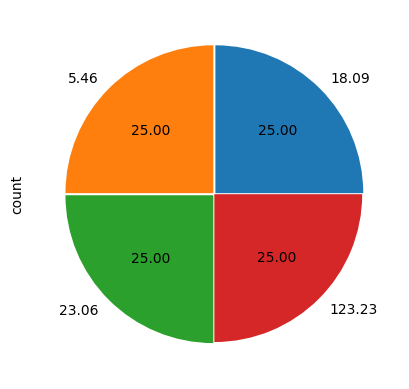

In [43]:
#Top 10 discount offered
df['Discount'].value_counts().sort_values(ascending= False).head(4).plot(kind = 'pie', autopct = '%1.2f', explode = [0.01, 0.01, 0.01, 0])

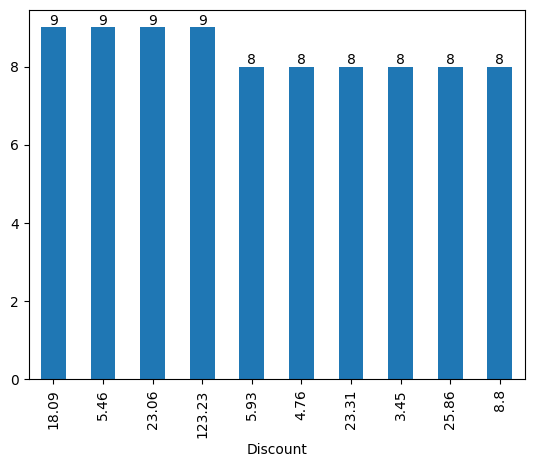

In [42]:
#Top 10 discount offered
bx = df['Discount'].value_counts().sort_values(ascending= False).head(10).plot(kind = 'bar')
bx.bar_label(bx.containers[0], fontsize=10); #for data labels customs

In [44]:
#Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45987 entries, 0 to 45986
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceID      45987 non-null  object        
 1   Date           45987 non-null  datetime64[ns]
 2   Year           45987 non-null  int32         
 3   CustomerID     45987 non-null  object        
 4   CustomerName   45987 non-null  object        
 5   Gender         45987 non-null  object        
 6   Age            45987 non-null  int64         
 7   Country        45987 non-null  object        
 8   Region         45987 non-null  object        
 9   StoreID        45987 non-null  object        
 10  StoreLocation  45987 non-null  object        
 11  SalesRep       45987 non-null  object        
 12  ProductID      45987 non-null  object        
 13  ProductName    45987 non-null  object        
 14  Category       45987 non-null  object        
 15  SubCategory    4598

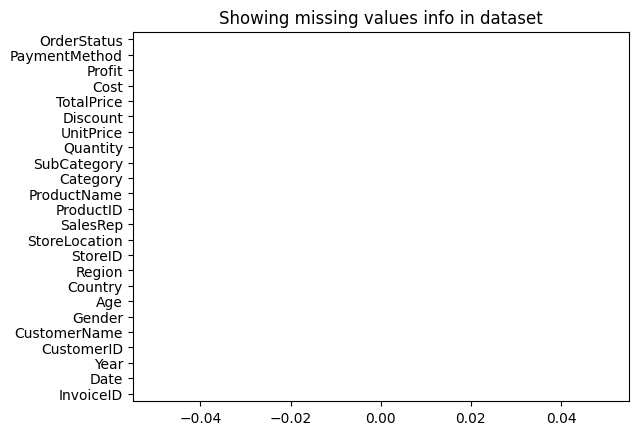

In [4]:
#Checking missing value info using graphical method
df.isnull().sum().plot(kind = 'barh', cmap = 'cividis')
plt.title("Showing missing values info in dataset")
plt.show()

In [5]:
#Split NUmerical columns and categorical columns
numerical_data = df.select_dtypes(exclude = 'object') #object-categorical hataya toh num obvio
categorical_data = df.select_dtypes(include = 'object')

In [6]:
#Checking descriptive stats : WOrks on Num Data
#Method 01: df.describe()
#Method 02: Write custom function

from collections import OrderedDict     #ordered dictionary

stats = []

for i in numerical_data:
  numerical_stats = OrderedDict({
      'Feature' : i,
      'Maximum' : df[i].max(),
      'Minimum' : df[i].min(),
      'Mean' : df[i].mean(),
      'Median' : df[i].median(),
      'Q1' : df[i].quantile(0.25),
      'Q3' : df[i].quantile(0.75),
      'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25),
      'Std' : df[i].std(),
      'skewness' : df[i].skew(),
      'kurtosis' : df[i].kurtosis()
  })

  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,Feature,Maximum,Minimum,Mean,Median,Q1,Q3,IQR,Std,skewness,kurtosis
0,Year,2024.00,2019.00,2021.506230,2022.00,2020.000,2023.000,3.000,1.707718,-0.010829,-1.270867
1,Age,70.00,18.00,43.934438,44.00,31.000,57.000,26.000,15.263793,-0.002181,-1.198934
2,Quantity,10.00,1.00,5.482049,5.00,3.000,8.000,5.000,2.872749,0.006117,-1.226361
3,UnitPrice,1000.00,10.01,505.933660,504.15,259.290,755.920,496.630,285.469959,0.003232,-1.201121
4,Discount,1938.69,0.00,276.968295,161.63,54.675,392.235,337.560,308.327029,1.749856,3.160420
5,TotalPrice,9969.08,8.15,2499.170757,1911.48,788.555,3732.940,2944.385,2073.681114,0.964069,0.172182
6,Cost,8777.88,5.71,1874.130857,1420.74,586.040,2783.875,2197.835,1581.121695,1.053258,0.521605
7,Profit,3843.50,1.08,625.039900,438.29,178.800,894.740,715.940,589.423080,1.476881,2.177847


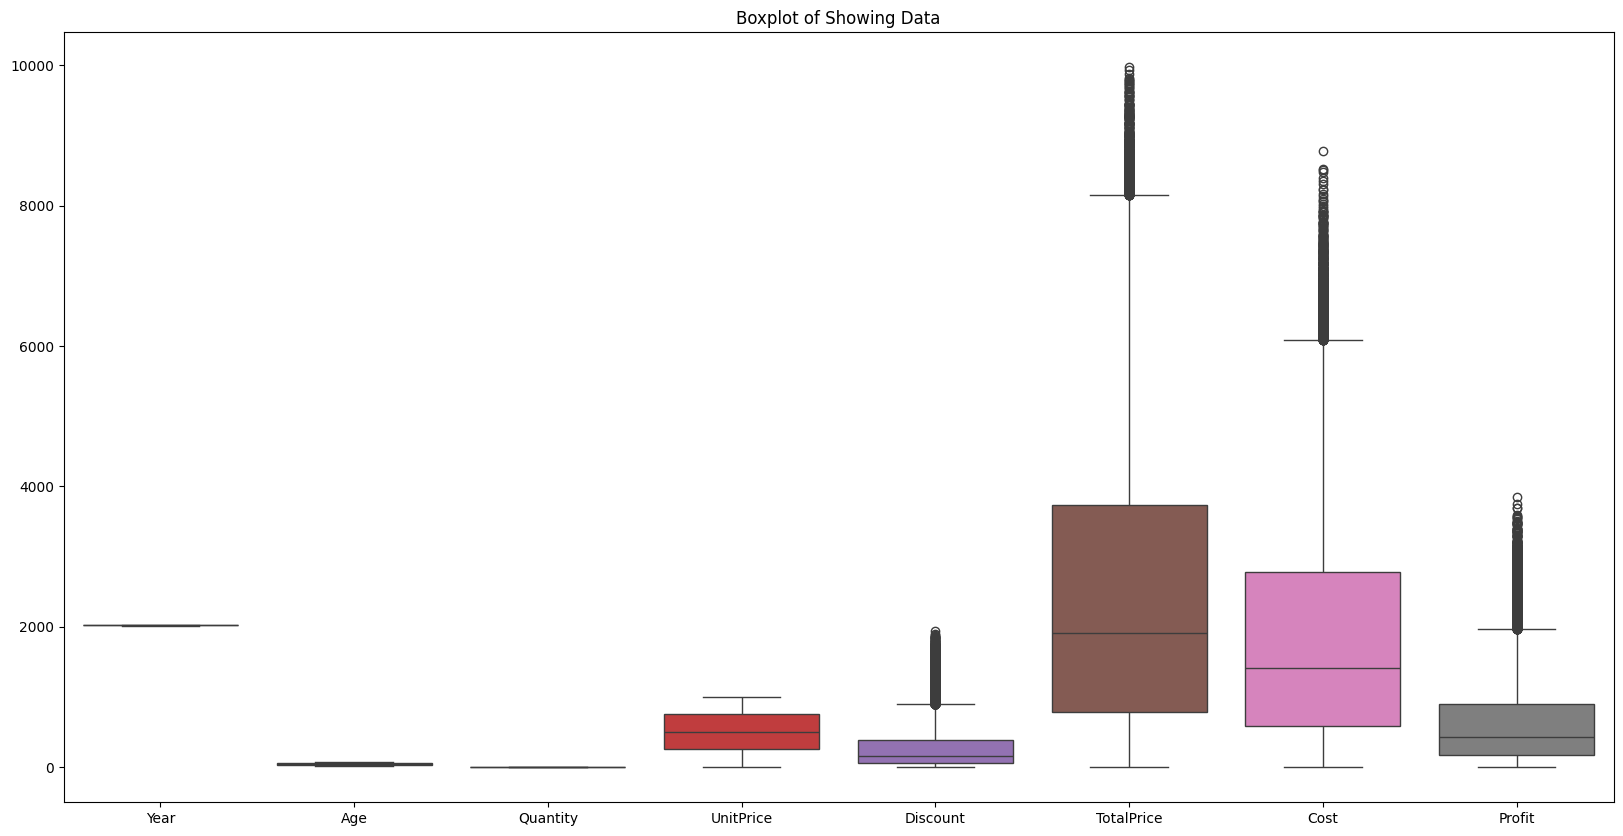

In [7]:
#Visualizing using box plot
plt.figure(figsize= (20,10)) #width 20, height = 10
sns.boxplot(data = numerical_data)
plt.title("Boxplot of Showing Data")
# plt.tight_layout() #if not specifing the figsize
plt.show() #higher the outliers(upper/lower whisker line) ML model will be more sensitive

In [8]:
#Converting object as Datatype into Datetime formating
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45987 entries, 0 to 45986
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceID      45987 non-null  object        
 1   Date           45987 non-null  datetime64[ns]
 2   Year           45987 non-null  int32         
 3   CustomerID     45987 non-null  object        
 4   CustomerName   45987 non-null  object        
 5   Gender         45987 non-null  object        
 6   Age            45987 non-null  int64         
 7   Country        45987 non-null  object        
 8   Region         45987 non-null  object        
 9   StoreID        45987 non-null  object        
 10  StoreLocation  45987 non-null  object        
 11  SalesRep       45987 non-null  object        
 12  ProductID      45987 non-null  object        
 13  ProductName    45987 non-null  object        
 14  Category       45987 non-null  object        
 15  SubCategory    4598

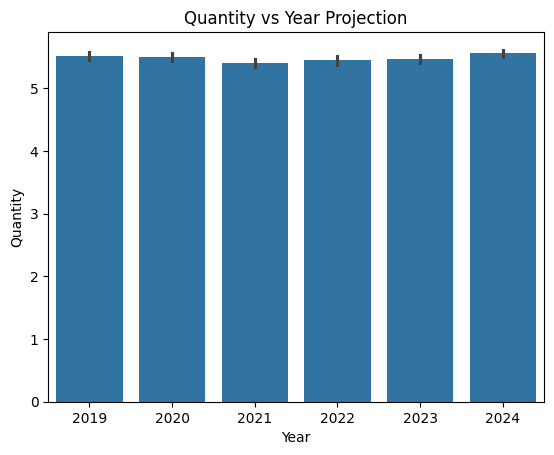

In [11]:
#Quantity vs Year Projection
sns.barplot(x = df['Year'],y = df['Quantity'] )
plt.title("Quantity vs Year Projection")
plt.show()

In [12]:
df.groupby('Year')['Quantity'].value_counts()

Year  Quantity
2019  9           787
      4           777
      6           777
      8           777
      1           776
      10          774
      3           761
      5           759
      2           753
      7           738
2020  4           811
      6           775
      8           775
      10          773
      1           763
      3           743
      2           734
      5           730
      7           723
      9           723
2021  1           803
      4           797
      2           796
      5           789
      3           768
      6           768
      8           763
      7           752
      9           740
      10          709
2022  4           797
      1           773
      2           768
      6           768
      7           766
      3           756
      8           755
      9           752
      5           729
      10          699
2023  2           819
      3           816
      8           809
      1           803
      6           794
      9           789
      10          787
      4           780
      5           760
      7           748
2024  8           797
      6           796
      10          784
      9           781
      3           757
      2           755
      7           746
      1           739
      4           735
      5           715
Name: count, dtype: int64

In [13]:
df.groupby('Year')['Category'].value_counts()

Year  Category   
2019  Home           1641
      Beauty         1594
      Electronics    1514
      Apparel        1478
      Sports         1452
2020  Sports         1568
      Electronics    1545
      Apparel        1511
      Beauty         1491
      Home           1435
2021  Beauty         1565
      Electronics    1551
      Sports         1538
      Apparel        1528
      Home           1503
2022  Apparel        1581
      Beauty         1542
      Sports         1496
      Electronics    1474
      Home           1470
2023  Apparel        1596
      Beauty         1589
      Home           1576
      Electronics    1574
      Sports         1570
2024  Home           1609
      Electronics    1551
      Sports         1492
      Apparel        1482
      Beauty         1471
Name: count, dtype: int64

<Axes: ylabel='Year,Category'>

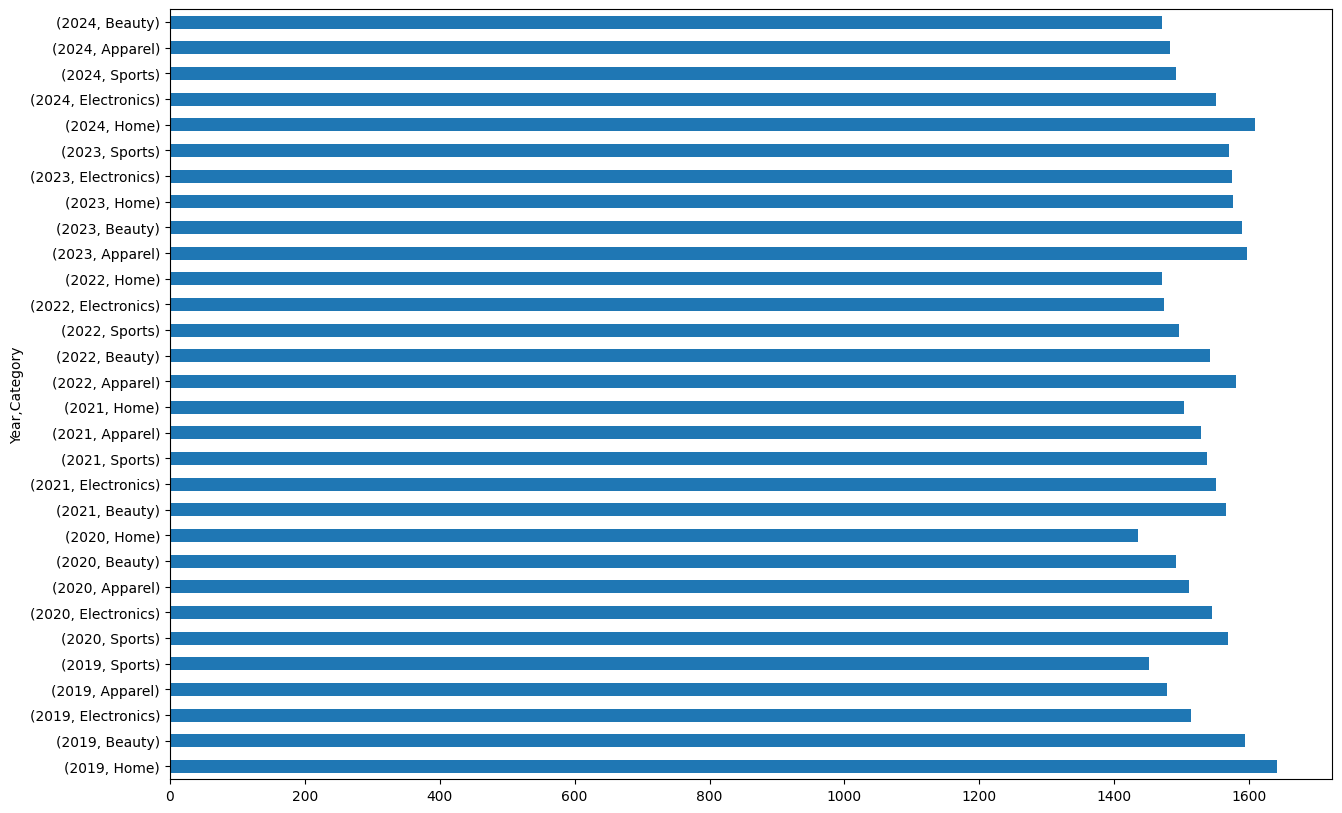

In [14]:
plt.figure(figsize = (15,10))
df.groupby('Year')['Category'].value_counts().plot(kind = 'barh')

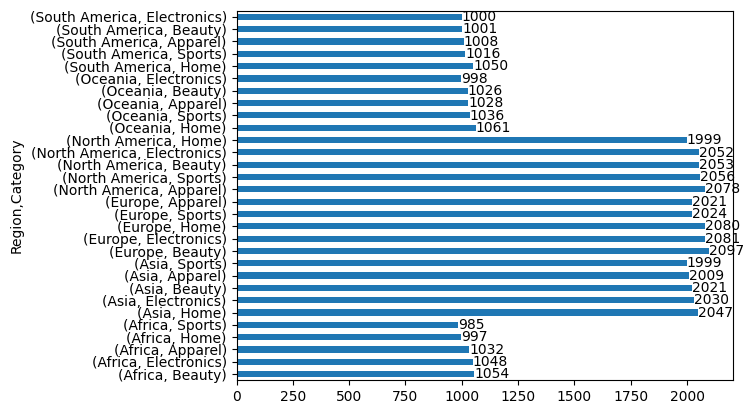

In [15]:
ax = df.groupby('Region')['Category'].value_counts().plot(kind = 'barh')
ax.bar_label(ax.containers[0], fontsize=10); #for data labels customs

In [47]:
df.groupby('Year')['Quantity'].value_counts()

Year  Quantity
2019  9           787
      4           777
      6           777
      8           777
      1           776
      10          774
      3           761
      5           759
      2           753
      7           738
2020  4           811
      6           775
      8           775
      10          773
      1           763
      3           743
      2           734
      5           730
      7           723
      9           723
2021  1           803
      4           797
      2           796
      5           789
      3           768
      6           768
      8           763
      7           752
      9           740
      10          709
2022  4           797
      1           773
      2           768
      6           768
      7           766
      3           756
      8           755
      9           752
      5           729
      10          699
2023  2           819
      3           816
      8           809
      1           803
      6           794
      9           789
      10          787
      4           780
      5           760
      7           748
2024  8           797
      6           796
      10          784
      9           781
      3           757
      2           755
      7           746
      1           739
      4           735
      5           715
Name: count, dtype: int64

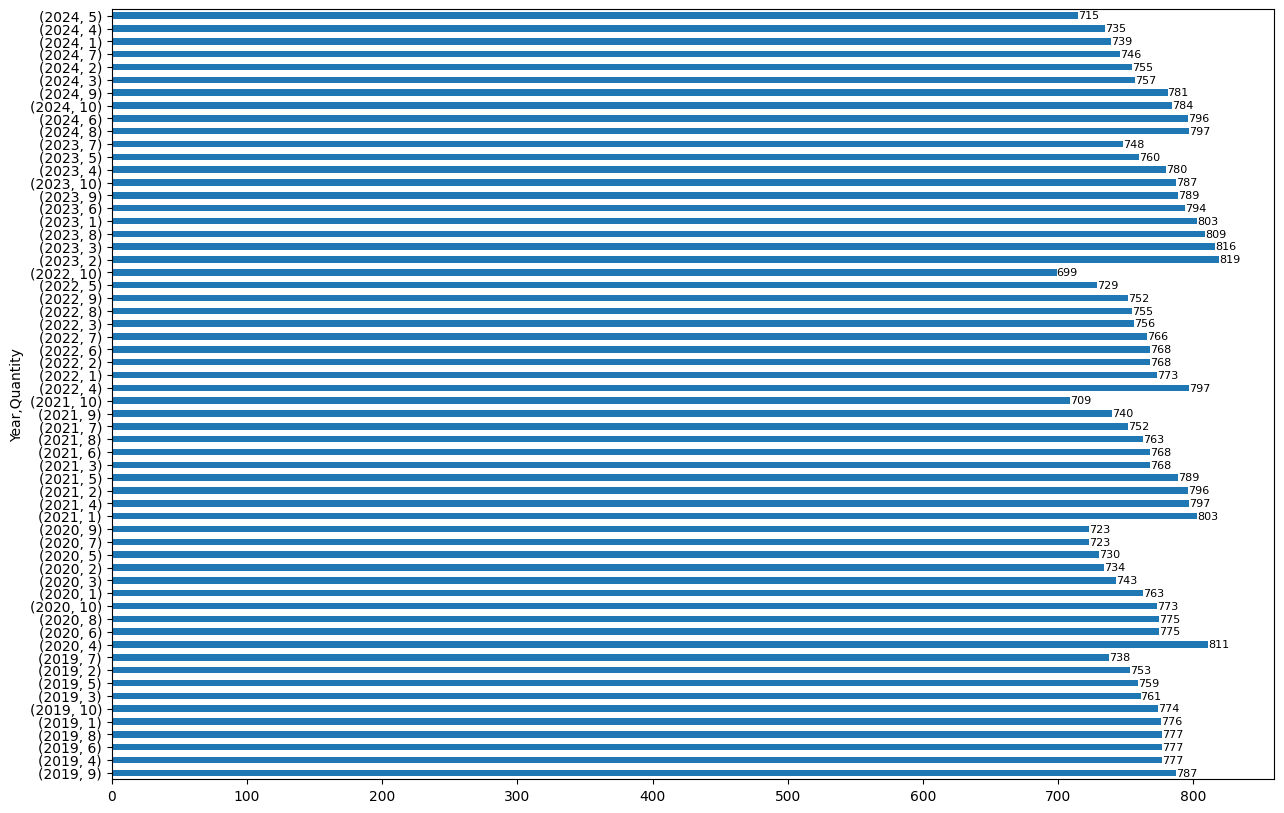

In [51]:
#Year v Quantity
plt.figure(figsize = (15,10))
cx = df.groupby('Year')['Quantity'].value_counts().plot(kind = 'barh')
cx.bar_label(cx.containers[0], fontsize=8); #for data labels customs

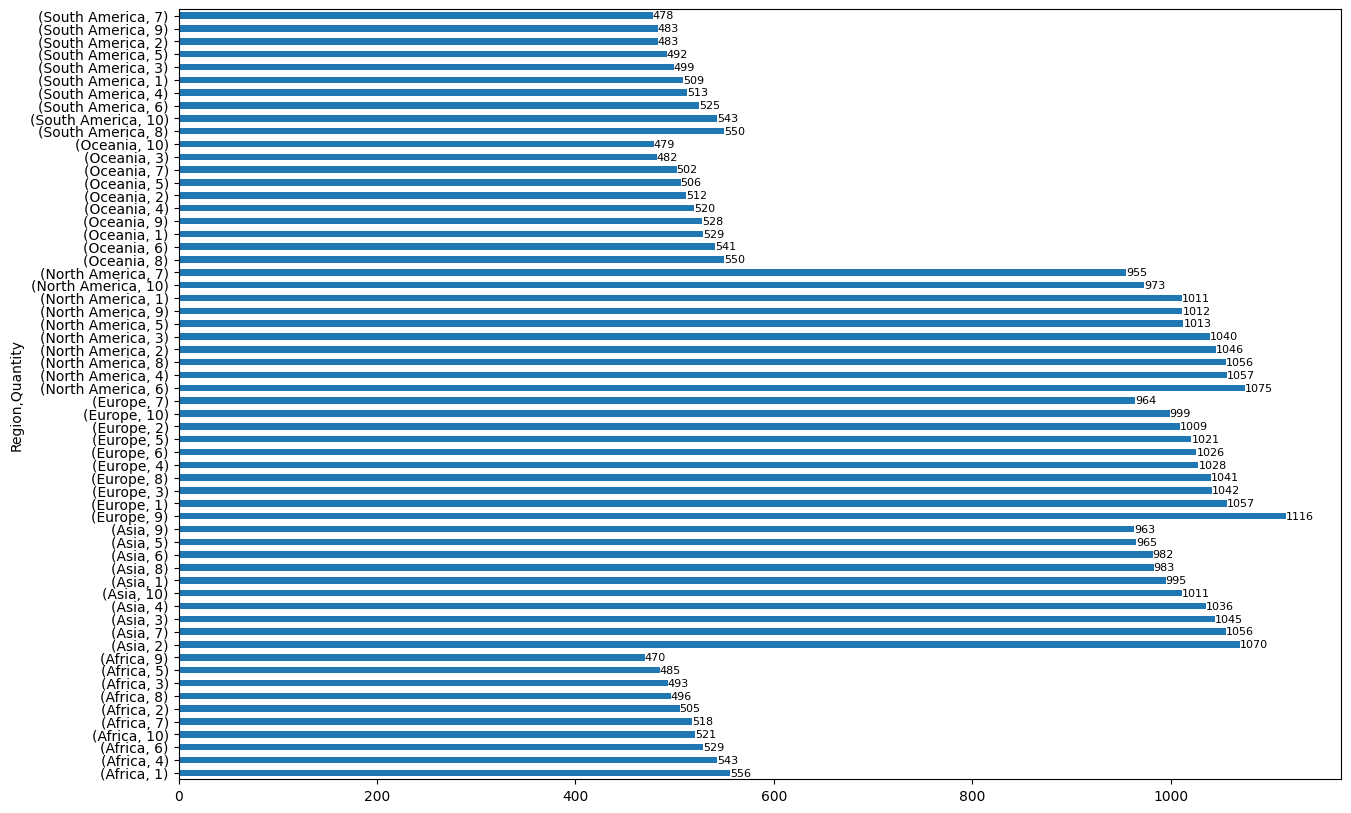

In [52]:
#Region vs Quantity
plt.figure(figsize = (15,10))
dx = df.groupby('Region')['Quantity'].value_counts().plot(kind = 'barh')
dx.bar_label(dx.containers[0], fontsize=8); #for data labels customs

In [53]:
df.groupby(['Region', 'Quantity'])['TotalPrice'].value_counts()

Region         Quantity  TotalPrice
Africa         1         8.92          1
                         9.61          1
                         12.74         1
                         12.92         1
                         13.62         1
                                      ..
South America  10        9621.73       1
                         9730.24       1
                         9746.16       1
                         9792.15       1
                         9875.39       1
Name: count, Length: 45920, dtype: int64

In [54]:
#Create New Feature: Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

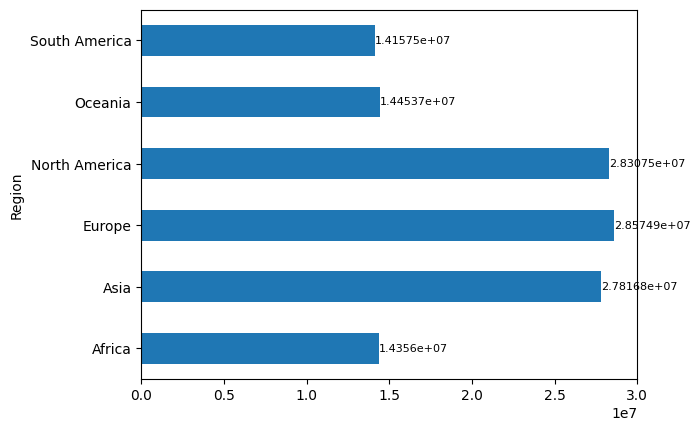

In [57]:
#Revenue Generated by region
ex = df.groupby('Region')['Revenue'].sum().plot(kind = 'barh'); #if not wanna put plt.show()
ex.bar_label(ex.containers[0], fontsize=8); #for data labels customs
